# Initial Analysis - Loading and Inspecting Dataset

In [8]:
# Load dataset
import pandas as pd

df = pd.read_csv("CW1_train.csv")

# Display dataset shape & column types
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

Dataset Shape: (10000, 31)

Column Data Types:
 outcome    float64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
a1         float64
a2         float64
a3         float64
a4         float64
a5         float64
b1         float64
b2         float64
b3         float64
b4         float64
b5         float64
a6         float64
a7         float64
a8         float64
a9         float64
a10        float64
b6         float64
b7         float64
b8         float64
b9         float64
b10        float64
dtype: object


In [9]:
# Check for missing values
print("\nMissing Values per Column:\n", df.isnull().sum())


Missing Values per Column:
 outcome    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
b5         0
a6         0
a7         0
a8         0
a9         0
a10        0
b6         0
b7         0
b8         0
b9         0
b10        0
dtype: int64


In [10]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


# Visualising Data Distributions

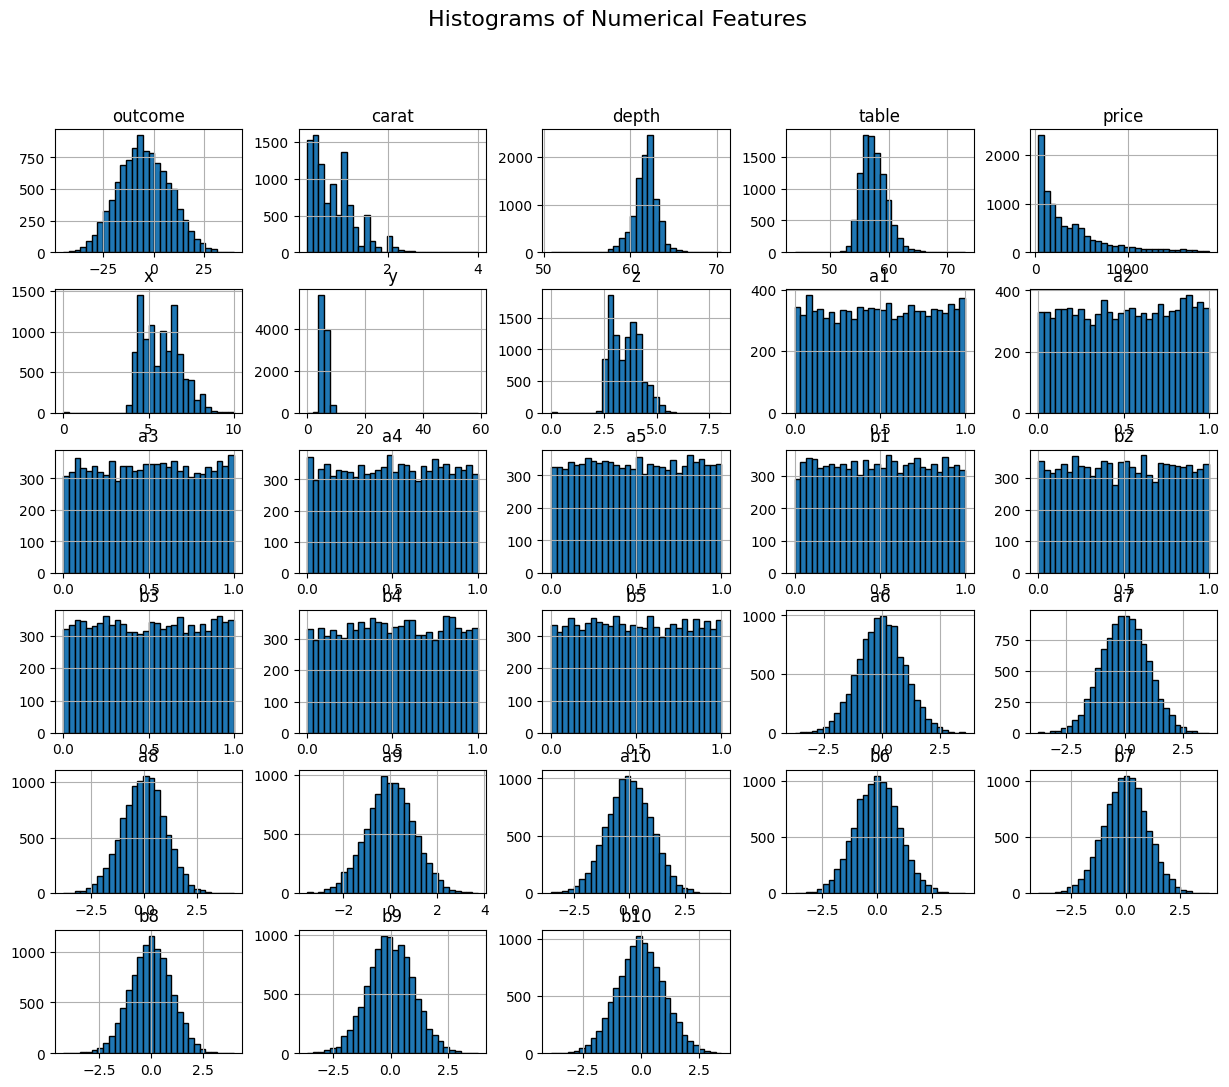

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (exclude categorical features)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
df[numerical_columns].hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

Skewed Distributions & Outliers:
- `price` is highly right-skewed (long tail on the right).
- `carat` also appears right-skewed, meaning we might need to apply log transformation to normalize it.
- `depth` and `table` seem to have a somewhat normal distribution but may have some concentration around specific values.

Normal Distributions:
- `outcome` appears roughly normally distributed.
- Many features (`b1` to `b10`, `a6` to `a10`) have a standardized normal-like distribution (centered around zero with symmetric spread).

Uniform Distributions:
- Some of the `a` and `b` features (`a1` to `a5`, `b1` to `b5`) appear to be uniformly distributed, which suggests they might be random or engineered features.

/tmp/ipykernel_916/4280640699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
/tmp/ipykernel_916/4280640699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
/tmp/ipykernel_916/4280640699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")


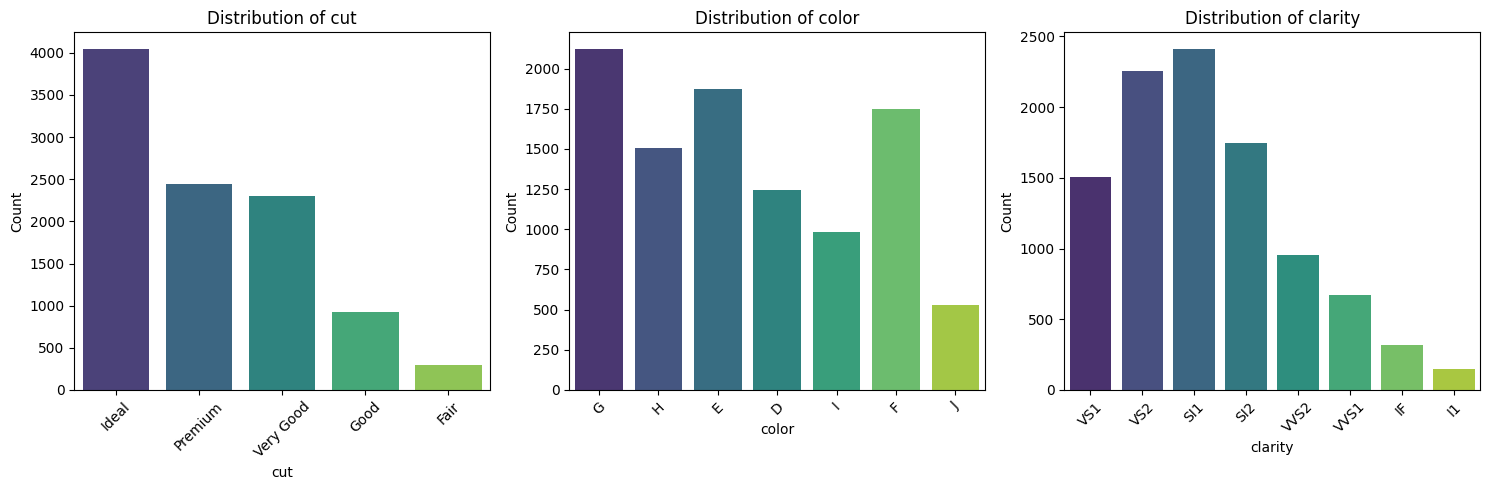

In [12]:
# Select categorical columns
categorical_columns = ['cut', 'color', 'clarity']

# Plot bar charts for categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Encoding Categorical Variables

In [13]:
# Identify categorical columns
categorical_cols = ['cut', 'color', 'clarity']  # Replace with actual categorical column names

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Detecting Outliers

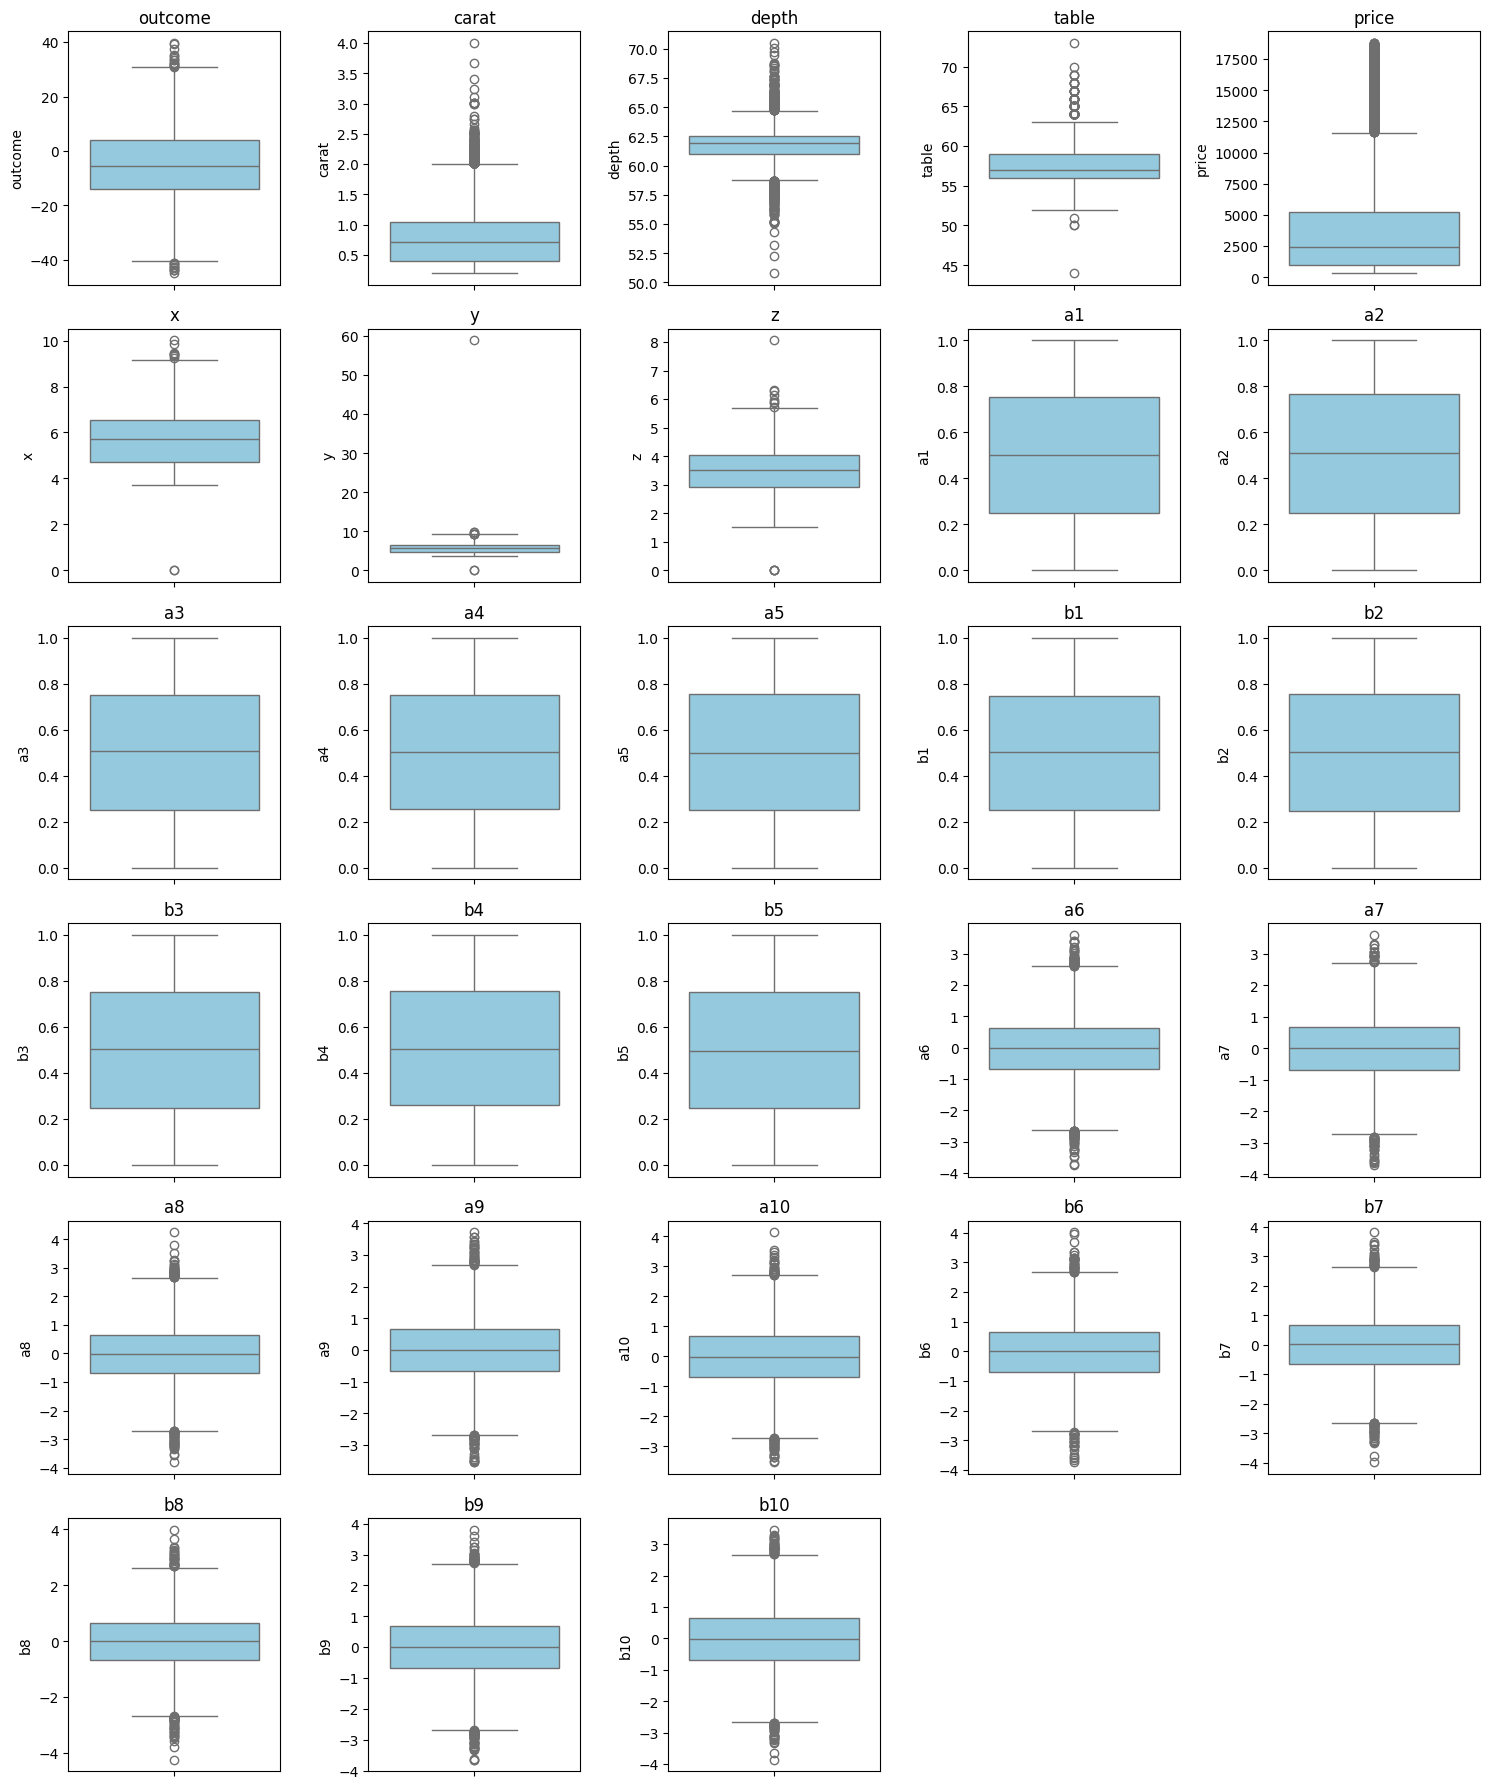

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define number of rows and columns for subplots dynamically
num_cols = 5  # Set number of columns
num_rows = int(np.ceil(len(numerical_columns) / num_cols))  # Compute required rows

# Create boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 3))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Remove empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

We will not remove outliers for now because feature meanings are unclear and no extreme skews justify immediate removal.

# Feature Selection

### Filter Methods

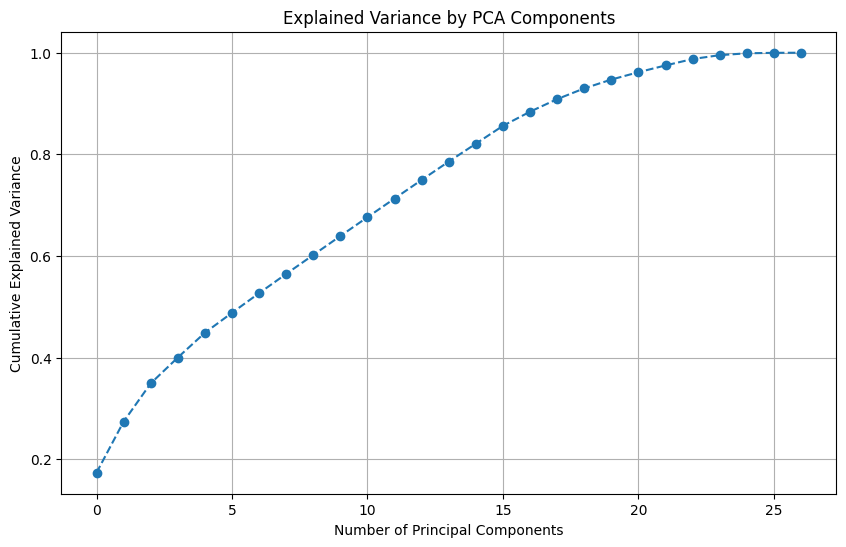

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize numerical features before PCA
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['outcome'])  # Exclude target
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

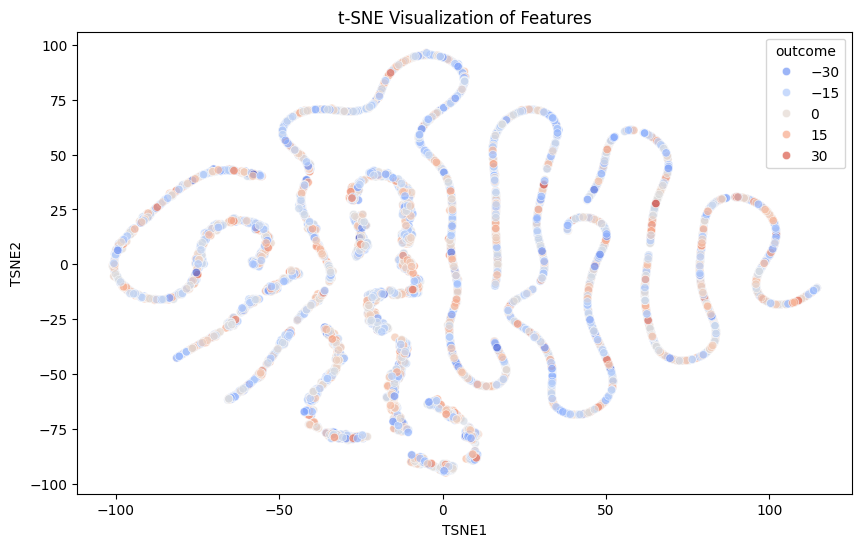

In [22]:
from sklearn.manifold import TSNE
import seaborn as sns

X = df_encoded.drop(columns=['outcome'])
y = df['outcome']

# Reduce features to 2D space using t-SNE
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_reduced, columns=['TSNE1', 'TSNE2'])
df_tsne['outcome'] = y  # Add target variable for color coding

# Plot t-SNE results
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_tsne['TSNE1'], y=df_tsne['TSNE2'], hue=df_tsne['outcome'], palette="coolwarm", alpha=0.7)
plt.title("t-SNE Visualization of Features")
plt.show()

- Lack of well-defined clusters: The dataset likely doesn’t have strong natural groupings, meaning that class separation isn’t straightforward.
- Non-linear relationships: Linear dimensionality reduction (like PCA) might not be the best approach, and we might need non-linear models.

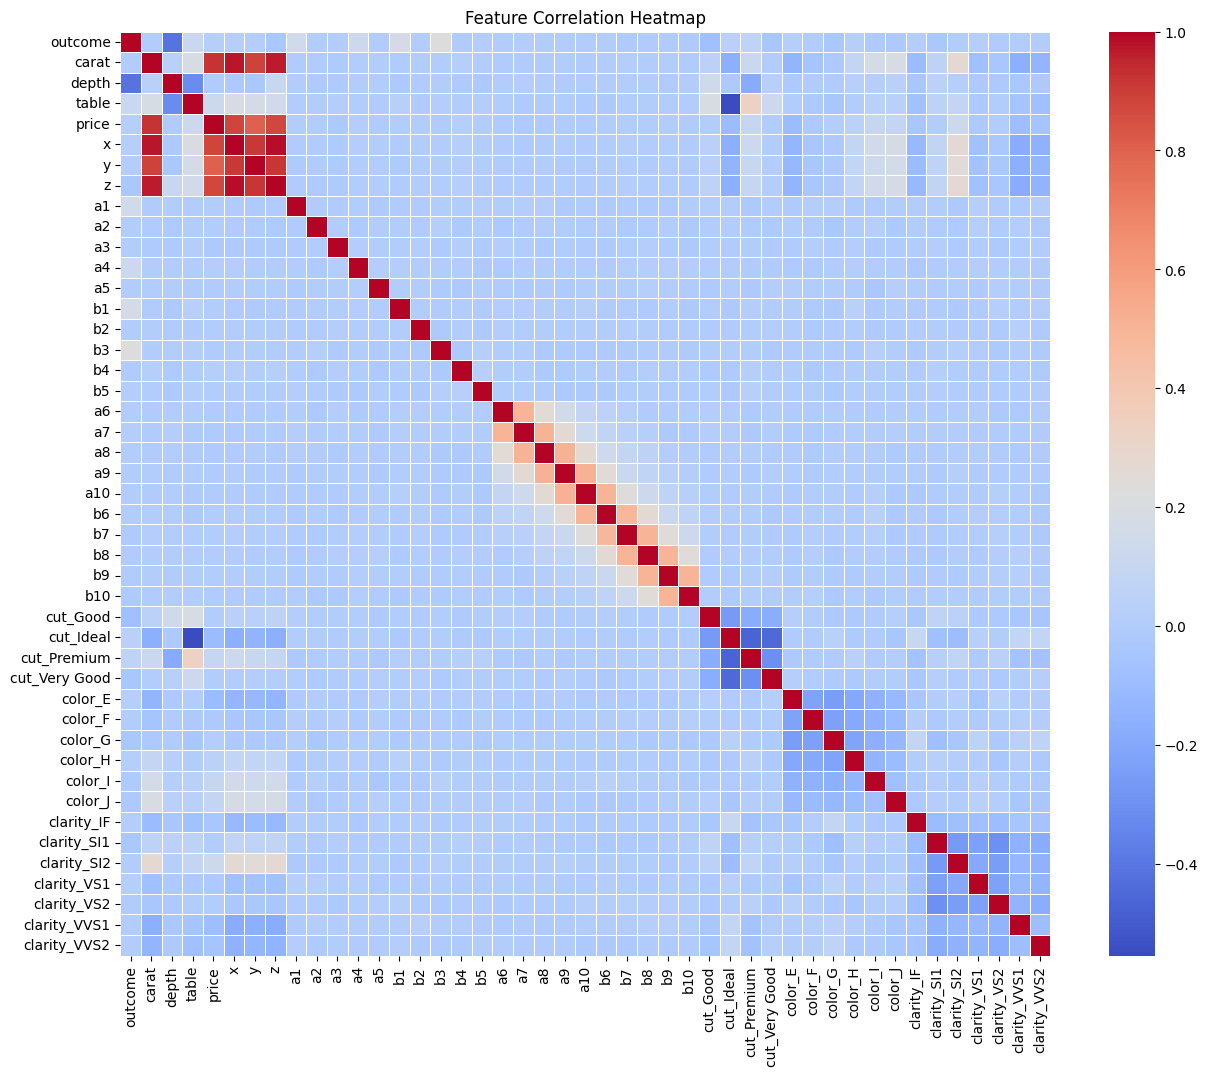


Feature Correlation with 'outcome':
 outcome          1.000000
b3               0.225407
b1               0.173719
a1               0.149101
a4               0.122441
table            0.114977
cut_Premium      0.063544
cut_Ideal        0.034769
color_E          0.021906
color_H          0.021096
x                0.020354
clarity_VS1      0.017983
price            0.016967
y                0.015924
clarity_IF       0.015535
a7               0.012512
b5               0.012370
clarity_VVS2     0.009951
clarity_VVS1     0.009886
a2               0.008760
a8               0.007983
a6               0.007238
clarity_SI2      0.006701
a9               0.005361
a3               0.003126
carat            0.002538
a10              0.002492
color_F          0.001840
b2               0.001640
a5               0.000690
b6               0.000079
b8              -0.002645
b4              -0.003845
clarity_VS2     -0.006620
b9              -0.007324
b7              -0.009241
b10             -0.012036


In [24]:
# Compute Pearson correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize correlation with a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Show correlations of all features with 'outcome'
correlation_with_target = correlation_matrix["outcome"].sort_values(ascending=False)
print("\nFeature Correlation with 'outcome':\n", correlation_with_target)

Correlations are quite low overall, so some feature transformation or synthesis may be necessary.

In [27]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display top features based on MI
print("\nMutual Information Scores:\n", mi_scores)


Mutual Information Scores:
 depth            0.200463
b3               0.030962
a1               0.023410
y                0.021983
b8               0.019346
a4               0.015043
z                0.012216
b4               0.008634
clarity_SI1      0.008243
b1               0.007634
a3               0.007155
x                0.006755
table            0.006301
a2               0.006211
b2               0.006056
cut_Good         0.005972
color_E          0.005423
a10              0.004593
a8               0.004011
color_G          0.003347
price            0.003153
color_J          0.002679
color_H          0.002662
b10              0.002468
clarity_VVS2     0.002265
color_I          0.001719
clarity_VS1      0.001596
b7               0.000839
cut_Ideal        0.000720
color_F          0.000698
clarity_IF       0.000000
clarity_SI2      0.000000
clarity_VS2      0.000000
clarity_VVS1     0.000000
carat            0.000000
cut_Very Good    0.000000
cut_Premium      0.000000
b9       

Features with Zero Mutual Information (Potential Candidates for Removal):
- `a6`, `a7`, `b5`, `a9`, `cut`, `b6`, `a5`, `b9`, `carat`: These contribute no additional information to predicting outcome.

Comparison from Pearson Correlation:
- `depth` is the strongest feature in both MI & correlation, reinforcing its importance.
- `color` and `clarity` show higher MI than correlation, suggesting potential nonlinear effects.
- Some features (`a6`, `a7`, `carat`) were already weak in correlation and now have zero MI, making them strong candidates for removal.

# Wrapper Methods

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Define models for RFE and RFA
linear_model = Lasso(alpha=0.01)  # LASSO for linear RFE
nonlinear_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest for nonlinear RFE

### RFE

In [29]:
# Apply RFE (Linear)
rfe_linear = RFE(linear_model, n_features_to_select=10)
rfe_linear.fit(X, y)
linear_ranking = pd.Series(rfe_linear.ranking_, index=X.columns).sort_values()

# Apply RFE (Nonlinear)
rfe_nonlinear = RFE(nonlinear_model, n_features_to_select=10)
rfe_nonlinear.fit(X, y)
nonlinear_ranking = pd.Series(rfe_nonlinear.ranking_, index=X.columns).sort_values()

# Display results
print("\nRFE (Linear - Lasso) Feature Rankings:\n", linear_ranking)
print("\nRFE (Nonlinear - Random Forest) Feature Rankings:\n", nonlinear_ranking)


RFE (Linear - Lasso) Feature Rankings:
 b3                1
cut_Premium       1
cut_Very Good     1
cut_Good          1
b1                1
color_H           1
a4                1
cut_Ideal         1
depth             1
a1                1
color_G           2
color_J           3
carat             4
color_E           5
clarity_SI1       6
clarity_VS2       7
color_I           8
y                 9
clarity_VVS1     10
b4               11
a7               12
table            13
b9               14
b8               15
b7               16
b6               17
b10              18
clarity_SI2      19
a9               20
a10              21
b2               22
a6               23
a8               24
price            25
a2               26
z                27
a3               28
b5               29
color_F          30
clarity_IF       31
x                32
clarity_VS1      33
a5               34
clarity_VVS2     35
dtype: int64

RFE (Nonlinear - Random Forest) Feature Rankings:
 b1            

### RFA

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

# Apply RFA (Forward Selection) - Lasso
rfa_linear = SequentialFeatureSelector(linear_model, direction="forward", n_features_to_select=10, cv=5)
rfa_linear.fit(X, y)
linear_selected = X.columns[rfa_linear.get_support()]

# Apply RFA (Forward Selection) - Random Forest
rfa_nonlinear = SequentialFeatureSelector(nonlinear_model, direction="forward", n_features_to_select=10, cv=5)
rfa_nonlinear.fit(X, y)
nonlinear_selected = X.columns[rfa_nonlinear.get_support()]

# Print selected features
print("\nRFA (Lasso) Selected Features:\n", linear_selected)
print("\nRFA (Random Forest) Selected Features:\n", nonlinear_selected)

# Evaluate model performance using cross-validation
linear_scores = cross_val_score(linear_model, X[linear_selected], y, cv=5, scoring='r2')
nonlinear_scores = cross_val_score(nonlinear_model, X[nonlinear_selected], y, cv=5, scoring='r2')


RFA (Lasso) Selected Features:
 Index(['carat', 'depth', 'a1', 'a4', 'b1', 'b3', 'cut_Ideal', 'color_E',
       'color_G', 'color_H'],
      dtype='object')

RFA (Random Forest) Selected Features:
 Index(['depth', 'b3', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_J', 'clarity_IF', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


# Embedded Methods

In [22]:
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd

# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso regression with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Get feature importance (Lasso shrinks coefficients of less important features to zero)
lasso_importance = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)

# Display top features
print("\nLasso Feature Importance:\n", lasso_importance)


Lasso Feature Importance:
 depth            5.361173
b3               2.867828
b1               2.102203
a1               1.909459
a4               1.511650
cut_Very Good    1.048664
cut_Premium      0.979731
cut_Ideal        0.828900
cut_Good         0.750581
carat            0.461802
color_G          0.281145
color_H          0.280666
y                0.240201
table            0.210456
clarity_SI1      0.188909
color_J          0.173375
clarity_VS2      0.170787
color_E          0.141234
a7               0.120815
color_I          0.101533
clarity_VVS1     0.071231
b4               0.064901
b8               0.061379
b7               0.055228
b9               0.052021
b10              0.035708
b6               0.029059
a9               0.016936
clarity_SI2      0.015754
b2               0.013071
clarity_IF       0.012158
a5               0.002100
b5               0.001284
a10              0.000000
z                0.000000
price            0.000000
x                0.000000
clarity_VS

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features
print("\nRandom Forest Feature Importance:\n", rf_importance)


Random Forest Feature Importance:
 depth            0.348646
b3               0.076963
b1               0.059738
a1               0.055717
a4               0.038597
a3               0.033317
a5               0.022273
b5               0.021845
a2               0.021421
b2               0.021380
a6               0.021375
b6               0.021084
b10              0.020493
a8               0.020075
b4               0.020058
b9               0.020026
a10              0.019952
a7               0.019632
b7               0.019572
a9               0.018902
b8               0.018744
price            0.014742
table            0.009959
y                0.008005
z                0.007951
x                0.007617
carat            0.005019
color_G          0.002653
color_H          0.002143
clarity_VS2      0.002078
cut_Ideal        0.002075
clarity_SI1      0.001917
cut_Very Good    0.001797
cut_Premium      0.001696
color_F          0.001640
clarity_SI2      0.001629
color_E          0.001588
cl

# Feature Selection

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Assuming df_encoded is the preprocessed dataset with target variable 'outcome'
X = df_encoded.drop(columns=['outcome'])  # Features
y = df_encoded['outcome']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using RFE with Lasso
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
rfe_lasso = RFE(lasso, n_features_to_select=10)
rfe_lasso.fit(X_train, y_train)
selected_rfe_lasso = X.columns[rfe_lasso.support_]

# Feature Selection using RFE with Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfe_rf = RFE(rf, n_features_to_select=10)
rfe_rf.fit(X_train, y_train)
selected_rfe_rf = X.columns[rfe_rf.support_]

# Feature Selection using LassoCV
lasso_select = SelectFromModel(lasso, prefit=True)
selected_lasso = X.columns[lasso_select.get_support()]

# Feature Selection using Random Forest Importance
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_rf = feature_importances.nlargest(10).index.tolist()

# Combine selected features from all methods
selected_features = list(set(selected_rfe_lasso) | set(selected_rfe_rf) | set(selected_lasso) | set(selected_rf))

# Print selected features
print("Selected Features:", selected_features)

# Final dataset with selected features
X_selected = X[selected_features]
X_selected['outcome'] = df['outcome']
X_selected.to_csv('selected_features.csv', index=False)

Selected Features: ['cut_Very Good', 'a4', 'depth', 'b5', 'b3', 'b1', 'color_E', 'color_I', 'b9', 'color_J', 'a7', 'b2', 'a2', 'price', 'color_H', 'a6', 'color_G', 'color_F', 'a3', 'a1']


# Feature Engineering

In [ ]:
import featuretools as ft
from featuretools import EntitySet

numerical_features = df_encoded.select_dtypes(include=[np.number, bool]).columns.tolist()
if "outcome" in numerical_features: 
    numerical_features.remove("outcome")  # Ensure outcome is NOT used in interactions

# Convert boolean features to integers (True/False → 1/0)
for col in df_encoded.select_dtypes(include=['bool']).columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Compute correlation with outcome
target_corr = df_encoded.corr()["outcome"].abs()
high_corr_features = target_corr[target_corr > 0.05].index.tolist()
if "outcome" in high_corr_features:
    high_corr_features.remove("outcome")

# Remove outcome from dataset before feature engineering
X_features = df_encoded[numerical_features].copy()

# Feature Engineering with Featuretools
entity_set = EntitySet(id="dataset")
entity_set.add_dataframe(dataframe_name="data", dataframe=X_features, index=df_encoded.index.name or "index")

feature_matrix, feature_defs = ft.dfs(
    entityset=entity_set,
    target_dataframe_name="data",
    agg_primitives=["mean", "sum", "min", "max", "std", "count"],  # Prevent excessive transformations
    trans_primitives=["add_numeric", "multiply_numeric", "absolute"],  # Kept essential transformations only
    max_depth=2  # Reduce complexity to avoid kernel crashes
)

# Handle missing and infinite values
feature_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
feature_matrix.fillna(feature_matrix.median(), inplace=True)

Traceback (most recent call last):
  File "/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/IPython/core/completer.py", line 3246, in _complete
    result = matcher(context)
             ^^^^^^^^^^^^^^^^
  File "/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/IPython/core/completer.py", line 2139, in magic_matcher
    matches = self.magic_matches(text)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/IPython/core/completer.py", line 2172, in magic_matches
    global_matches = self.global_matches(bare_text)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/IPython/core/completer.py", line 1114, in global_matches
    for word in lst:
RuntimeError: dictionary changed size during iteration
/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IPro

[INFO] Creating EntitySet...
[INFO] Generating new features with Featuretools...


/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['count', 'max', 'mean', 'min', 'std', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


[INFO] Feature generation complete.
[INFO] Handling missing and infinite values...
[INFO] Data cleaning complete.


Selecting engineered features

In [28]:
import pandas as pd
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.model_selection import train_test_split

# Load dataset
df_encoded = pd.read_csv('processed_features.csv')

# Define features and target
X = df_encoded.drop(columns=['outcome'])
y = df_encoded['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using LassoLarsCV (faster than LassoCV)
lasso = LassoLarsCV(cv=5).fit(X_train, y_train)

# Select features using Lasso
lasso_select = SelectFromModel(lasso, prefit=True)
selected_lasso = X.columns[lasso_select.get_support()]

# Feature Selection using RFE with Lasso (optimized with step=10)
rfe_lasso = RFE(lasso, n_features_to_select=10, step=10)
rfe_lasso.fit(X_train, y_train)
selected_rfe_lasso = X.columns[rfe_lasso.support_]

# Feature Selection using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Select top features using RF importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_rf = feature_importances.nlargest(10).index.tolist()

# Select features using SelectFromModel for RF
sfm = SelectFromModel(rf, threshold="mean")  # Keeps features above mean importance
sfm.fit(X_train, y_train)
selected_sfm_rf = X.columns[sfm.get_support()]

# Combine selected features from all methods
selected_features = list(set(selected_lasso) | set(selected_rfe_lasso) | set(selected_rf) | set(selected_sfm_rf))

# Print selected features
print("Selected Features:", selected_features)

# Final dataset with selected features
X_selected = X[selected_features]
X_selected['outcome'] = df_encoded['outcome']  # Correct reference to df_encoded

/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 486 iterations, i.e. alpha=6.237e-03, with an active set of 298 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 483 iterations, alpha=5.718e-03, previous alpha=5.699e-03, with an active set of 264 regressors.
  warnings.warn(
/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 470 iterations, i.e. alpha=4.242e-03, with 

Selected Features: ['a4 + clarity_SI2', 'a2 + b4', 'a5 * depth', 'a4 * b2', 'a7 * price', 'a1 + b1', 'clarity_IF * depth', 'b2 + color_F', 'clarity_VS2 * depth', 'b5 * price', 'color_G * depth', 'a2 * a5', 'a3 + cut_Ideal', 'ABSOLUTE(b8)', 'a10 * b6', 'a3 + color_I', 'a1 + clarity_VS2', 'a6 * b9', 'b8 * b9', 'b10 + table', 'cut_Very Good * price', 'b2 + b5', 'a10 + depth', 'a4 + clarity_SI1', 'a2 + clarity_SI1', 'a4 + depth', 'a8 * color_G', 'a8 * table', 'a3 + clarity_VS1', 'a8 + b9', 'a2 * b9', 'b8 * table', 'b5 + cut_Premium', 'b2 + clarity_VS2', 'b1 + clarity_SI1', 'b6 * depth', 'b1 + cut_Premium', 'a6 + cut_Ideal', 'a1 + cut_Ideal', 'b2 * b5', 'b5 * depth', 'a3 + color_J', 'b7 + color_G', 'a2 + clarity_VS2', 'a7 + b8', 'b6 + color_H', 'b1 + clarity_VS1', 'b2 + depth', 'a1 + a2', 'a6 * b6', 'b1 + clarity_VVS2', 'a4 + b5', 'b3 + clarity_SI2', 'color_F * price', 'a6 + b8', 'a4 + b2', 'carat * price', 'b5 + color_H', 'b9 + table', 'b3 * table', 'a2 * a4', 'a3 + color_F', 'a1 + depth',

In [ ]:
import numpy as np

# Compute correlation matrix for selected features
corr_matrix = X_selected.corr().abs()

# Identify upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation higher than threshold (e.g., 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Remove highly correlated features
X_final = X_selected.drop(columns=to_drop)

# Save processed dataset
X_final.to_csv("processed_features.csv", index=False)

print("Final Features after correlation filtering:", X_final.columns.tolist())

Final Features after correlation filtering: ['a4 + clarity_SI2', 'a2 + b4', 'a5 * depth', 'a4 * b2', 'a7 * price', 'a1 + b1', 'clarity_IF * depth', 'b2 + color_F', 'clarity_VS2 * depth', 'b5 * price', 'color_G * depth', 'a2 * a5', 'a3 + cut_Ideal', 'ABSOLUTE(b8)', 'a10 * b6', 'a3 + color_I', 'a6 * b9', 'b8 * b9', 'b10 + table', 'cut_Very Good * price', 'b2 + b5', 'a10 + depth', 'a4 + clarity_SI1', 'a2 + clarity_SI1', 'a8 * color_G', 'a8 * table', 'a3 + clarity_VS1', 'a8 + b9', 'a2 * b9', 'b8 * table', 'b5 + cut_Premium', 'b1 + clarity_SI1', 'b6 * depth', 'b1 + cut_Premium', 'a6 + cut_Ideal', 'a1 + cut_Ideal', 'b5 * depth', 'a3 + color_J', 'b7 + color_G', 'a7 + b8', 'b1 + clarity_VS1', 'a1 + a2', 'a6 * b6', 'b1 + clarity_VVS2', 'a4 + b5', 'b3 + clarity_SI2', 'color_F * price', 'a6 + b8', 'carat * price', 'b5 + color_H', 'b3 * table', 'a2 * a4', 'a3 + color_F', 'b2 + cut_Premium', 'b1 + b4', 'a6 + cut_Premium', 'a8 * price', 'b10 * b7', 'b9 + cut_Premium', 'clarity_VVS2 * price', 'b1 + b

: 